In [15]:
import numpy as np
import matplotlib.pyplot as plt

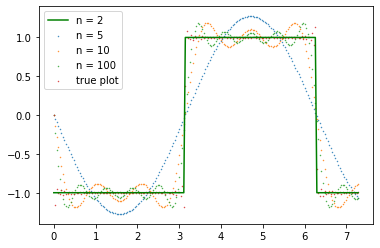

In [16]:
lamb = 2*np.pi
a = lamb/2
b = lamb
f0 = 1
f1 = -f0

def compute_square(k):
    #k denotes the number of fourier coefficents we're taking
    An = []
    Bn = []
    kn = [2 * n * np.pi/lamb for n in range(1, k+1)]
    for n in range(1, k+1):
        An.append(1/ (n * np.pi) * (f1*np.sin(kn[n-1]*a) + f0 *np.sin(kn[n-1] * b) - f0 * np.sin(kn[n-1] * a) - f1 * np.sin(kn[n-1] * b)))
        Bn.append(1 /(n * np.pi) * (np.cos(kn[n-1]*a) + f1 - f0 * np.cos(kn[n-1] *b) + f0 * np.cos(kn[n-1] * a) - f1 + f1 * np.cos(kn[n-1]*b)))
    f_n = lambda x: np.sum([An[i] * np.cos(kn[i] * x) + Bn[i] * np.sin(kn[i] * x) for i in range(len(An))]) + (f1*a + f1*(lamb - b) + f0*(b - a))/lamb 
    return f_n
square_2 = compute_square(2)
square_5 = compute_square(5)
square_10 = compute_square(10) 
square_100 = compute_square(100)

x_values = np.linspace(0, lamb+1, 200)

def square(x):
    if a < x < b:
        return f0
    else :
        return f1
    
vfunc_sq = np.vectorize(square)
true_square = [vfunc_sq(x_values[i]) for i in range(len(x_values))]

plt.scatter(x_values, [square_2(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.scatter(x_values, [square_5(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.scatter(x_values, [square_10(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.scatter(x_values, [square_100(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.plot(x_values, true_square, c = 'green')
plt.legend(["n = 2", "n = 5", 'n = 10', "n = 100", 'true plot'])
plt.show()


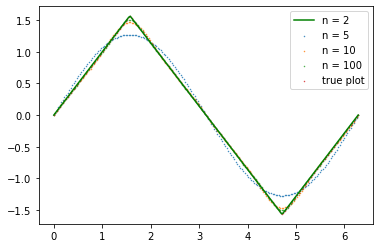

In [17]:
#Write your answer here

lamb = 2 * np.pi
def compute_triangle(k):
    Bn = []
    kn = [2 * n * np.pi/lamb for n in range(1, k+1)]
    for n in range(1, k+1):
        Bn.append(2/lamb * (lamb**2 * np.cos(np.pi*n) * (np.pi * n * np.cos(np.pi* n/2) - 2 * np.sin(np.pi * n/2))/(4 * np.pi**2 * n**2)
                 - lamb**2 * (2 * np.sin(3 * np.pi * n/2) + np.pi * n * np.cos(3 * np.pi * n/2))/(8 * np.pi**2 * n**2)
                 - lamb**2 * (np.pi * n * np.cos(np.pi * n/2) - 2 * np.sin(np.pi*n/2))/(8 * np.pi**2 *n**2)))
    fn = lambda x: np.sum([Bn[i] * np.sin(kn[i] * x) for i in range(len(Bn))]) # add A_0 term here
    return fn

triangle_2 = compute_triangle(2)
triangle_5 = compute_triangle(5)
triangle_10 = compute_triangle(10)
triangle_100 = compute_triangle(100)

x_values = np.linspace(0, lamb, 200)

def triangle(x):
    if 0 <= x <=lamb/4:
        return x
    elif lamb/4 < x <= 3 * lamb/4:
        return lamb/2 - x
    else:
        return x - lamb

vfunc_tri = np.vectorize(triangle)
true_triangle = [vfunc_tri(x_values[i]) for i in range(len(x_values))]

plt.scatter(x_values, [triangle_2(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.scatter(x_values, [triangle_5(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.scatter(x_values, [triangle_10(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.scatter(x_values, [triangle_100(x_values[i]) for i in range(len(x_values))], s = 0.2)
plt.plot(x_values, true_triangle, c = 'green')
plt.legend(["n = 2", "n = 5", 'n = 10', "n = 100", 'true plot'])
plt.show()


In [48]:
# Square wave
delta = 0.1

diffs_sq1 = []
diffs_sq2 = []

diffs_tri1 = []
diffs_tri2 = []
for n in range(1, 101):
    fourier_sq = compute_square(n)
    fourier_tri = compute_triangle(n)
    #10 points within this interval is a fine enough resolution
    
    #first discontinuity - Square wave
    x_values = np.linspace(lamb/2 - delta, lamb/2 + delta, 25)
    diffs_sq1.append(np.abs(np.max([fourier_sq(x_values[i]) for i in range(len(x_values))]) - 
                        np.max([vfunc_sq(x_values[i]) for i in range(len(x_values))])))
    
    # second discontinuity - Square wave
    x_values = np.linspace(lamb-delta, lamb+delta, 25)
    diffs_sq2.append(np.abs(np.max([fourier_sq(x_values[i]) for i in range(len(x_values))]) - 
                        np.max([vfunc_sq(x_values[i]) for i in range(len(x_values))])))
    
    #first discontinuity - Triangle Wave
    x_values = np.linspace(lamb/4 - delta, lamb/4 + delta, 50)
    diffs_tri1.append(np.abs(np.max([fourier_tri(x_values[i]) for i in range(len(x_values))]) - 
                        np.max([vfunc_tri(x_values[i]) for i in range(len(x_values))])))
    
    #second discontinuity - Triangle Wave
    x_values = np.linspace(3*lamb/4 - delta, 3 * lamb/4 + delta, 50)
    diffs_tri2.append(np.abs(np.min([fourier_tri(x_values[i]) for i in range(len(x_values))]) - 
                        np.min([vfunc_tri(x_values[i]) for i in range(len(x_values))])))

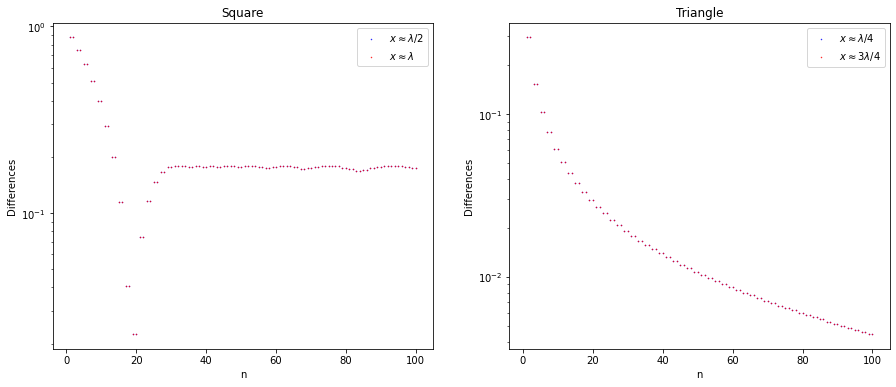

In [49]:
n = np.linspace(1, 100, 100)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
axs[0].scatter(n, diffs_sq1, s = 0.2, c = 'b')
axs[0].scatter(n, diffs_sq2, s = 0.2, c = 'r')
axs[0].legend([r'$x \approx \lambda/2$', r'$x \approx \lambda$'])
# axs[1].title('Overshoot/Undershoot for Square Wave')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Differences')
axs[0].set_title('Square')
axs[0].set_yscale('log')

axs[1].scatter(n, diffs_tri1, s = 0.2, c = 'b')
axs[1].scatter(n, diffs_tri2, s = 0.2, c = 'r')
axs[1].legend([r'$x \approx \lambda/4$', r'$x \approx 3\lambda/4$'])
axs[1].set_ylabel('Differences')
axs[1].set_xlabel('n')
axs[1].set_yscale('log')
axs[1].set_title('Triangle')
# axs[2].title('Overshoot/Undershoot for Triangle Wave')
plt.show()

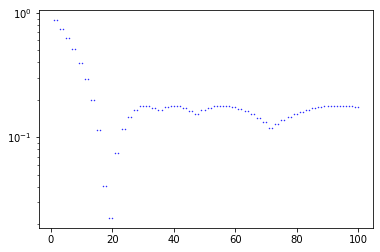

In [23]:
plt.scatter(n, diffs_sq1, s = 0.2, c = 'b')
plt.yscale('log')
plt.show()